<a href="https://colab.research.google.com/github/DmitriiDenisov/mlcourse_dubai/blob/master/jupyter_notebooks/Lecture_04_Linear_Regression/topic-4-LinearRegressiob_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1. Basic data analysis with Pandas

In this task we will use [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) data containing information about height and weight of 25 thousands teenagers.

**[1]. If you haven't installed yet Seaborn library you should execute *conda install seaborn* in the terminal. (Seaborn isn't part of Anaconda and it provides suitable high level functionality for data visualization).**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#import scipy.optimize
from scipy.optimize import minimize_scalar,minimize

# BB added this option
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Read the data about height and weight into Pandas DataFrame:

In [3]:
data = pd.read_csv('../data/weights_heights.csv', index_col='Index')

First thing you should do after reading the data is to look at first records. It helps to find the data reading errors (for example, when we have 1 column instead of 10 and it has 9 dots with commas in column name). Also it allows to take a closer look at the data and features and their nature (numerical, categorical, etc.).

Than we should plot histograms of feature distributions. Also it can help to understand features nature (power-series distribution or standard or something else). Histogram can help us find some values that aren't similar to each other - outliers.
It is convenient to plot histograms using *plot* method of Pandas DataFrame with option *kind='hist'*.

**Example.** Let's plot the histogram of teenager's height distribution. We use method *plot* for DataFrame *data* with options *y='Height'* (the feature which distribution we want to plot).

In [3]:
# Look at first records
data.head()

# Shape
print("Rows and Columns", data.shape)
print("\n")

# Check more information
data.info()

print("\n Check if data has any missing values")
data.columns[data.isnull().any()]


# Histogram for Height is depicted below, and for Weight in the next question

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Rows and Columns (25000, 2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
Height    25000 non-null float64
Weight    25000 non-null float64
dtypes: float64(2)
memory usage: 585.9 KB

 Check if data has any missing values


Index([], dtype='object')

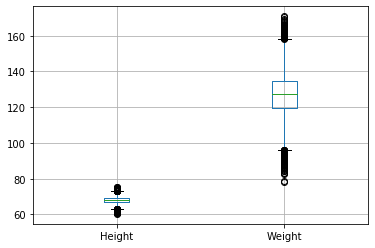

In [4]:
# Feature distributions
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1ACE63388>,
      dtype=object)

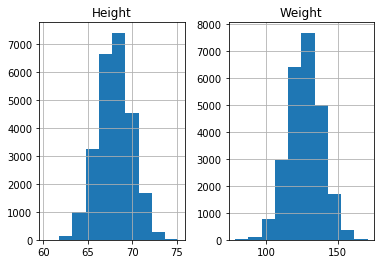

In [5]:
data.hist()

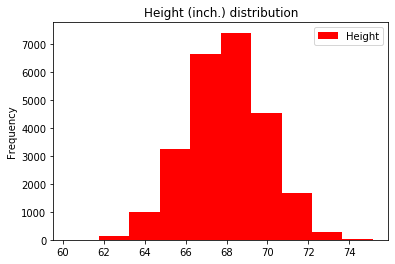

In [6]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution');

Options:

- *y='Height'* - the feature which distribution we want to plot
- *kind='hist'* - means that plot type is histogram
- *color='red'* - set color

**[2]. Look at the first 5 rows using *head* method of Pandas DataFrame. Plot the histogram of weight distribution using method *plot* Pandas DataFrame. Make the color of histogram to be green and add title.**

In [7]:
# First 5 rows
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


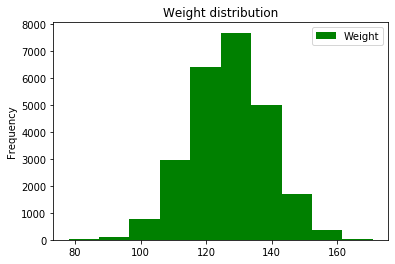

In [8]:
# Plot the histogram of weight distribution using method *plot* Pandas DataFrame. 
# Make the color of histogram to be green and add title.

data.plot(y='Weight', kind='hist', 
           color='green',  title="Weight distribution");

One of the most effective methods of basic data analysis is mapping pairwise dependencies of features. We make $m \times m$ plots (*m* is number of features) where we have histograms of feature distributions in diagonal and scatter plots of two feature dependencies outside. We can do this using $scatter\_matrix$ method of Pandas Data Frame or *pairplot* of Seaborn library. 

To illustrate this method we add third feature. Let's create *bodymass index* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). To do this we use *apply* method of Pandas FataFrame and Python's lambda functions.

In [9]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [10]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [11]:
# Checking!
data.head()

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


In [12]:
data.describe()

,Height,Weight,BMI
count,25000.000000,25000.000000,25000.000000
mean,67.993114,127.079421,19.321455
std,1.901679,11.660898,1.551895
min,60.278360,78.014760,13.070826
25%,66.704397,119.308675,18.278284
50%,67.995700,127.157750,19.302198
75%,69.272958,134.892850,20.357657
max,75.152800,170.924000,26.023651


**[3]. Create the picture that contains pairwise dependencies of features 'Height', 'Weight' и 'BMI'. You should use *pairplot* method of Seaborn library.**

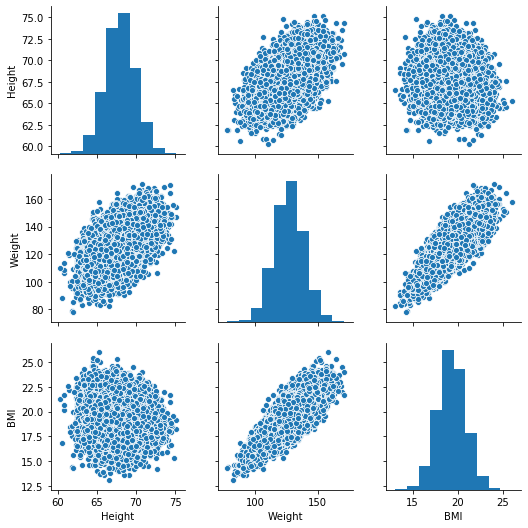

In [13]:
# pairplot
%config InlineBackend.figure_format = 'png'
sns.pairplot(data[['Height', 'Weight', 'BMI']])

During the basic analysis you often have to investigate dependencies of numerical from categorical features (for example, dependency between salary and employee sex). In this case we can use boxplots from Seaborn library. Box plot is a compact way to show real value statistics (mean and quartiles) by different values of categorical feature. It also helps to find outliers - observations that have very different values from others.

**[4]. Create new feature *weight_category* in DataFrame *data* that will have 3 values: 1 if the weight is less than 120 pounds, 3 if the weight is greater or equal to 150 pounds, 2 in other cases. Create boxplot showing dependency between height and weight category. Use *boxplot* method of Seaborn library and *apply* method of Pandas DataFrame. Add titles "Height" to *y* axis and "Weight category" to *x* axis.**

In [14]:
def weight_category(weight):
    #pass 
    if weight < 120: 
        w_ctg = 1
    elif weight >= 150:
        w_ctg = 3
    else: 
        w_ctg = 2
        
    return w_ctg

data['weight_cat'] = data['Weight'].apply(weight_category)

data.head()
data.dtypes

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


Height        float64
Weight        float64
BMI           float64
weight_cat      int64
dtype: object

<Figure size 864x360 with 0 Axes>

[Text(0, 0.5, 'Height'),
 Text(0.5, 0, 'Weight Category'),
 Text(0.5, 1.0, ' Dependency Between Height and Weight Category ')]

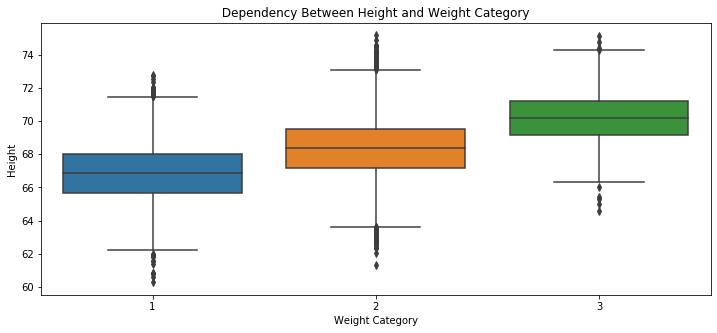

In [15]:
# Create boxplot showing dependency between height and weight category.
# Add titles "Height" to *y* axis and "Weight category" to x axis.

plt.figure(figsize=(12, 5))
sns.boxplot(y='Height', x='weight_cat', data=data).set(title = ' Dependency Between Height and Weight Category ', xlabel = 'Weight Category', ylabel = 'Height' )


**[5]. Create scatter plot of dependencies between height and weight using *plot* method for Pandas DataFrame with option *kind='scatter'*. Add title to the figure.**

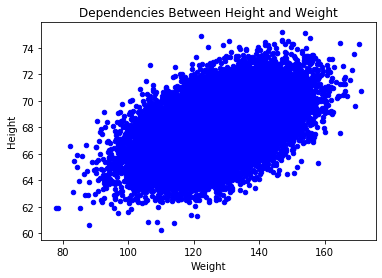

In [23]:
data.plot(x= 'Weight', y='Height', kind='scatter', 
           color='blue',  title="Dependencies Between Height and Weight");


## Part 2. Squared Error Minimization

In basic case the task of real value prediction by other features (regression task) can be solved using squared error minimization.

**[6]. Create function computing squared error of dependency approximation between height $y$ and weight $x$ using straight line $y = w_0 + w_1 * x$ by two parameters $w_0$ and $w_1$:**
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Where $n$ is number of observations in dataset, $y_i$ and $x_i$ are height and weight of $i$th person in dataset. 

In [16]:
#n = data.shape[0]
#w0=3
#w1=2
#datatemp= data[0:2]
#datatemp
# for i in range(0, len(df)):
# print df.iloc[i]['Height'], df.iloc[i]['Weight']
    
def error(w0,w1):
    summation = 0
    for (idx, row) in data.iterrows():
        summation = summation  +  (row.loc['Height'] - (w0 + (w1*row.loc['Weight'])))**2
    
    return summation    
   
#t = error(w0,w1)
#print("The error is ", t)  

In [32]:
# Draw some lines?? I am not sure if this is required, but just in case, I will assume test values for w0 and w1
# w0=80
# w1=0.7

#ax=plt.gca()
#ax.plot(w1, error(w0,w1), label='Error Growth')

#x = np.linspace(50,100,100)
#y = w0 + (x*w1)
#plt.plot(x, y)

# w0=90
# w1=0.5

#y = w0 + (x*w1)
#plt.plot(x, y)

#plt.xlabel('Height')
#plt.ylabel('Weight')
#plt.title('Dependency Between Height and Weight - Just a Test for Q6')

#plt.scatter(X_test, y_test,  color='gray')
#plt.plot(X_test, y_pred, color='red', linewidth=2)
#plt.show()

So we are solving the task how to draw a straight line through the points cloud corresponding to observations in our dataset in space of features "Height" and "Weight" to minimize function[6]. Let's start with drawings some lines and make sure they transfer dependencies from height to weight.

**[7]. On plot from [5] Problem 1 draw two straight lines corresponding to values of parameters $w_0, w_1) = (60, 0.05)$ and ($w_0, w_1) = (50, 0.16)$. Use *plot* method from *matplotlib.pyplot* and *linspace* method from NumPy library. Add the titles to axes and plot.**

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Height')

Text(0.5, 1.0, 'Dependency Between Height and Weight')

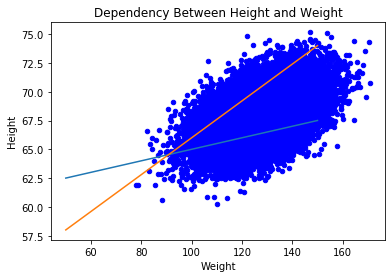

In [17]:
# Your code here
data.plot(x= 'Weight', y='Height', kind='scatter', color='blue',  title="Dependencies Between Height and Weight");

ax=plt.gca()
#ax.plot(w1, error(w0,w1), label='Error Growth')

x = np.linspace(50,150,100)
y = 60 + (x*0.05)
plt.plot(x, y)

y = 50 + (x*0.16)
plt.plot(x, y)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Dependency Between Height and Weight')

#plt.title('Graph of Hight and Weight')
#plt.xlabel('x', color='#1C2833')
#plt.ylabel('y', color='#1C2833')
#plt.legend(loc='upper left')
#plt.grid()
#plt.show()
#plt.plot([70, 70], [100, 250], 'k-', lw=2)

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Height')

Text(0.5, 1.0, 'Dependency Between Height and Weight')

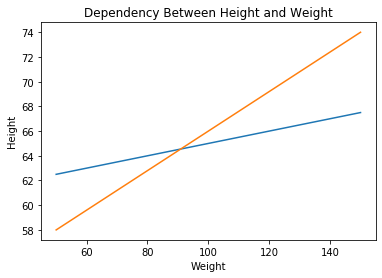

In [18]:
# If only the lines are required ...

ax=plt.gca()
#ax.plot(w1, error(w0,w1), label='Error Growth')

x = np.linspace(50,150,100)
y = 60 + (x*0.05)
plt.plot(x, y)

y = 50 + (x*0.16)
plt.plot(x, y)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Dependency Between Height and Weight')


Squared error function minimization is very easy task because of the function's convex nature. There are many optimization methods for this problem. Let's look at dependency between error function and the first parameter (slope of the straight line) if the second parameter (absolute term) is fixed.

**[8]. Plot dependency between error function calculated in [6] and $w_1$ parameter when $w_0$ = 50. Add the titles to axes and plot.**

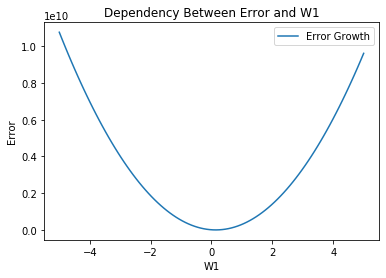

In [40]:
w0=50
w1 = np.linspace(-5, 5, 100)

ax=plt.gca()
ax.plot(w1, error(w0,w1), label='Error Growth')

# Add a legend
plt.legend()
plt.xlabel('W1')
plt.ylabel('Error')
plt.title('Dependency Between Error and W1')

# Show the plot
plt.show();

Now we can find the slope of the straight line approximating dependency between height and weight when coefficient is fixed $w_0 = 50$ using optimization method.

**[9]. Using *minimize_scalar* method from *scipy.optimize* find the minimum of the function[6] for parameter value $w_1$ in range [-5,5]. Draw on plot [5] Problem 1 the straight line corresponding to the values of parameters ($w_0$, $w_1$) = (50, $w_1\_opt$) where $w_1\_opt$ is optimal value of parameter $w_1$ that was found in [8].**

In [22]:
# Find the minimum
w0=50
minResult = minimize_scalar(lambda w1: error(w0,w1), bounds=(-5,5))
w1_opt = minResult.x
print("The min of function error(w0,w1) for parameter value w1 is fournd to be ", w1_opt)

# The following also returns the same
#minResult1 = minimize_scalar(lambda w1: error(w0,w1), bounds=(-5,5), method='bounded')

The min of function error(w0,w1) for parameter value w1 is fournd to be  0.14109203728834385


Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Height')

Text(0.5, 1.0, 'By Using Minimize Scalar Method')

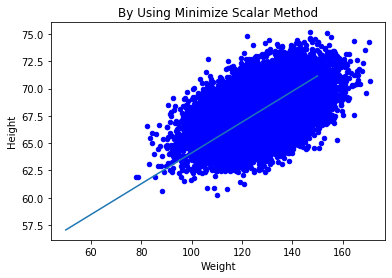

In [23]:
# 
data.plot(x= 'Weight', y='Height', kind='scatter', color='blue',  title="Dependencies Between Height and Weight");

ax=plt.gca()
#ax.plot(w1, error(w0,w1), label='Error Growth')

x = np.linspace(50,150,100)
y = 50 + (x*w1_opt)
plt.plot(x, y)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('By Using Minimize Scalar Method')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Height')

Text(0.5, 1.0, 'By Using Minimize Scalar Method')

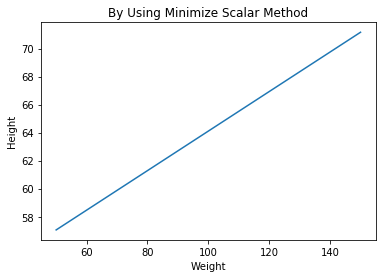

In [45]:
# In case Only Line is required

ax=plt.gca()
#ax.plot(w1, error(w0,w1), label='Error Growth')

x = np.linspace(50,150,100)
y = 50 + (x*w1_opt)
plt.plot(x, y)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('By Using Minimize Scalar Method')

When you analyze multidimensional data, you often want to get intuitive understanding about data nature using visualization. It is impossible to plot the data when you have more than 3 features. It is better to choose 2 or 3 principal components from data and represent them in plane or volume.

Let's have a look how Python can draw 3D figures on example of function $z(x,y) = sin(\sqrt{x^2+y^2})$ for values of $x$ и $y$ from interval [-5,5] with step 0.25

In [25]:
#from mpl_toolkits.mplot3d import Axes3D

Create objects of type matplotlib.figure.Figure (picture) and  matplotlib.axes._subplots.Axes3DSubplot (axes). 

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

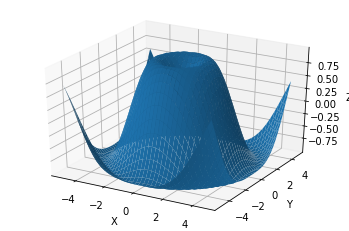

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Create NumPy arrays with data points on X and Y axes.
# Use meshgrid method creating matrix of coordinates
# By vectors of coordinates. Set needed function Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Finally use *plot_surface* method of type object
# Axes3DSubplot. Add titles to axes.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10]. Create 3D-plot between error function calculated in [6] and parameters $w_0$ and $w_1$. Add titles "Intercept" to the $x$ axis, "Slope" to the $y$ axis, "Error" to the $z$ axis.**

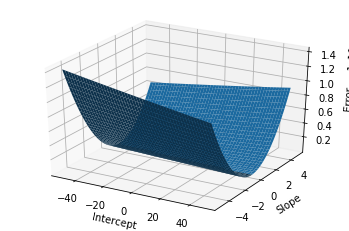

In [25]:
# 3D plot between error function and parameters w0 and w1

fig = plt.figure()
#plt.rcParams['figure.figsize'] = (12,7)
#fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d') # get current axis

# X is W0
X = np.arange(-50, 50, 0.25)
# Y is W1
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = error(X,Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show();

In [0]:
# Your code here

In [0]:
# Your code here

**[11]. Find the minimum of the function in [6] using *minimize* method from scipy.optimize for parameters values $w_0$ in range [-100,100] and $w_1$ in range [-5, 5]. Starting point is ($w_0$, $w_1$) = (0, 0). Use L-BFGS-B optimization method (option method in minimize). Draw on plot from [5] Problem 1 the straight line coresponding finded optimal values of parameters $w_0$ and $w_1$. Add titles to the axes and plot.**

In [35]:
# Find min of function
#minResult = minimize_scalar(lambda w1: error(w0,w1), bounds=(-5,5))

bnds = ((-100, 100), (-5, 5))
#x0=[0,0]
initGuess=(0,0)

minResult2 = minimize(lambda x: error(*x), x0=initGuess, method='L-BFGS-B', bounds=bnds)

In [36]:
# Display the results

minResult2
minResult2.x

w0_optimal = minResult2.x[0]
w1_optimal = minResult2.x[1]                  

print(w0_optimal)
print(w1_optimal)

      fun: 67545.2870856901
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.01309672, 0.13824319])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57175421,  0.08200666])

array([57.57175421,  0.08200666])

57.57175421319638
0.08200666202355257


Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Height')

Text(0.5, 1.0, 'By Using Minimize and L-BFGS-B Method')

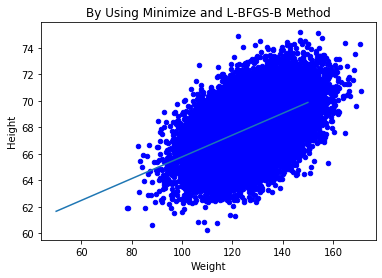

In [59]:
# Draw a plot
data.plot(x= 'Weight', y='Height', kind='scatter', color='blue',  title="Dependencies Between Height and Weight");

ax=plt.gca()
#ax.plot(w1, error(w0,w1), label='Error Growth')

x = np.linspace(50,150,100)
y = w0_optimal + (x*w1_optimal)
plt.plot(x, y)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('By Using Minimize and L-BFGS-B Method')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Height')

Text(0.5, 1.0, 'By Using Minimize and L-BFGS-B Method')

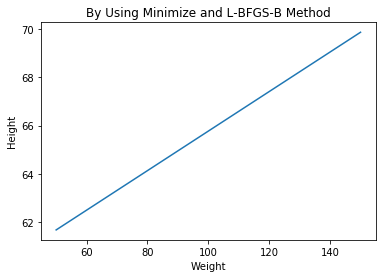

In [28]:
# Without drawing on figure 5
ax=plt.gca()
#ax.plot(w1, error(w0,w1), label='Error Growth')

x = np.linspace(50,150,100)
y = w0_optimal + (x*w1_optimal)
plt.plot(x, y)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('By Using Minimize and L-BFGS-B Method')

In [34]:
#def error2(w0,w1,x,y_actual):
#    y_pred = w0+w1*x
#    theEr = ((y_actual-y_pred)**2)
#    return theEr

#w0=50
#y_actual = data['Height']
#x = data['Weight']

#result333 = minimize(fun=error2,
#                  x0=(0,0),
#                  method='L-BFGS-B',
#                  bounds=((-100, 100), (-5, 5)), args = (x, y_actual,))
